## Exploratory Data Analysis of Top Streamers on Twitch

### Importing necessary libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Loading 'Top Streamers on Twitch' (dataset)

### We are going to use 'Top Streamers on Twitch' dataset from kaggle.com.

https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

In [2]:
data = pd.read_csv("twitchdata-update.csv")

### 1) Understanding the data

In [3]:
data.head()

,Channel,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [4]:
data.tail()

,Channel,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English
999,Remx,122192850,99180,13788,1205,178553,59432,2049420,True,False,French


In [5]:
data.describe()

,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [6]:
data.shape

(1000, 11)

In [7]:
data.columns

Index(['Channel', 'Watch_time_minutes', 'Stream_time_minutes', 'Peak_viewers',
       'Average_viewers', 'Followers', 'Followers_gained', 'Views_gained',
       'Partnered', 'Mature', 'Language'],
      dtype='object')

In [8]:
data.nunique()

Channel                1000
Watch_time_minutes     1000
Stream_time_minutes     962
Peak_viewers            990
Average_viewers         926
Followers              1000
Followers_gained        998
Views_gained           1000
Partnered                 2
Mature                    2
Language                 21
dtype: int64

In [9]:
data['Language'].unique()

array(['English', 'Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'], dtype=object)

### 2) Cleaning the data

In [10]:
#checking for null values in the data
data.isnull().sum()

Channel                0
Watch_time_minutes     0
Stream_time_minutes    0
Peak_viewers           0
Average_viewers        0
Followers              0
Followers_gained       0
Views_gained           0
Partnered              0
Mature                 0
Language               0
dtype: int64

#### Outlier detection and removal using Interquartile range (IQR)

In [12]:
#shape of dataframe
data.shape

(1000, 11)

In [13]:
#descriptive stats
data.describe()

,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


#### Ploting Boxplots to check for Outliers

In [14]:
#defining a function called 'plot_boxplot'
def plot_boxplot(data, ft):
    data.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

In [15]:
data.describe()

,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


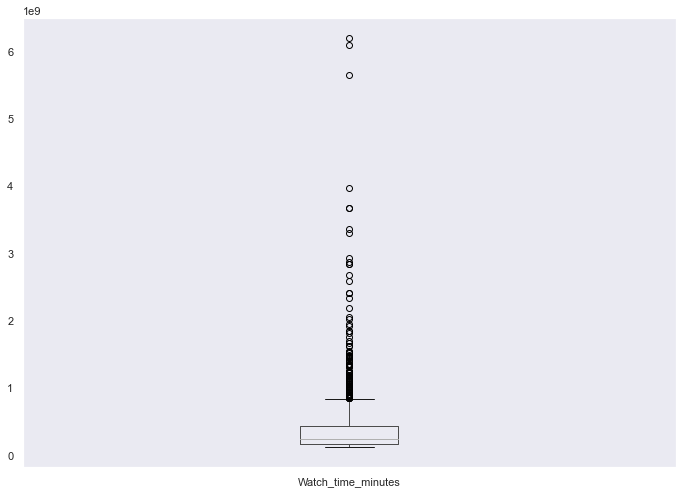

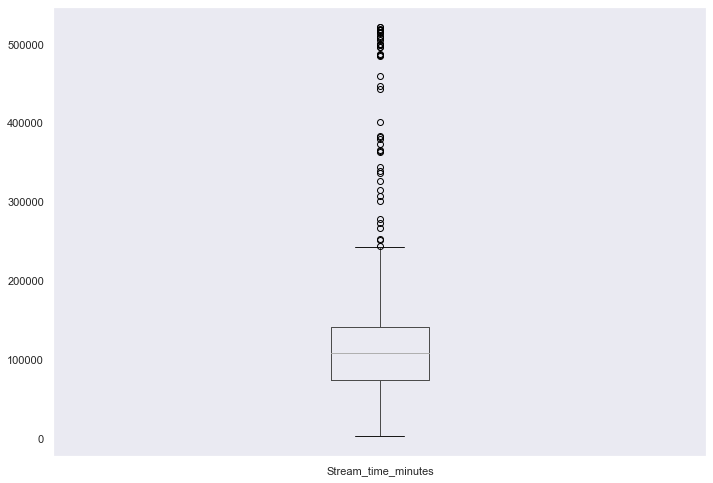

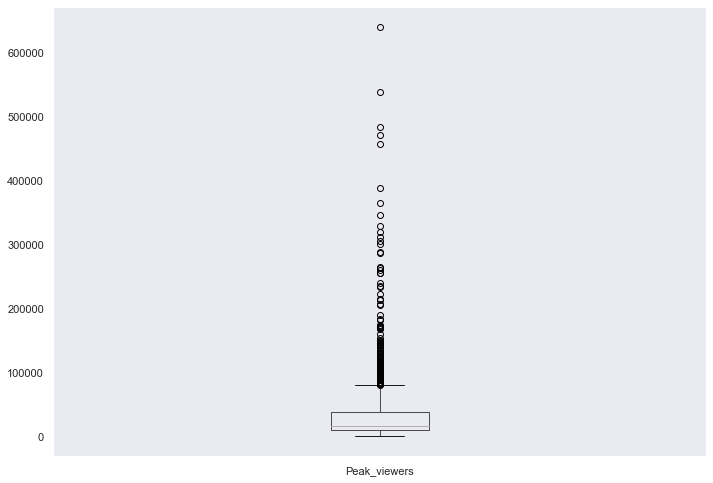

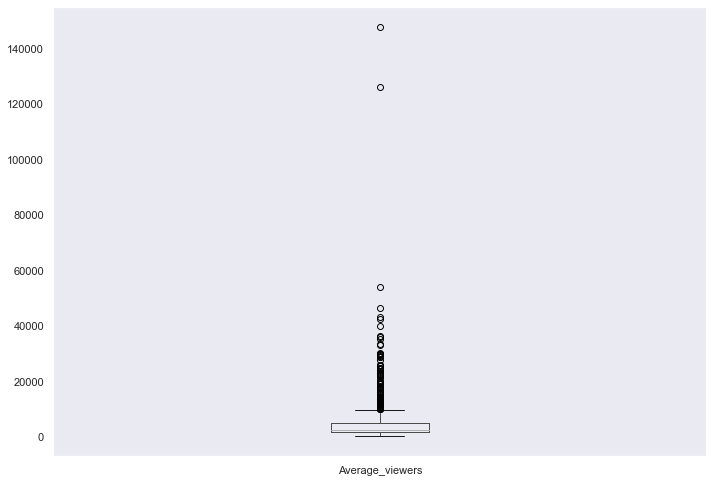

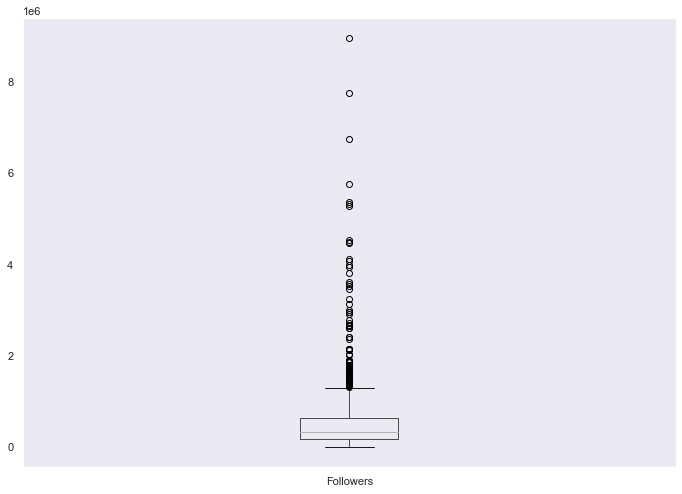

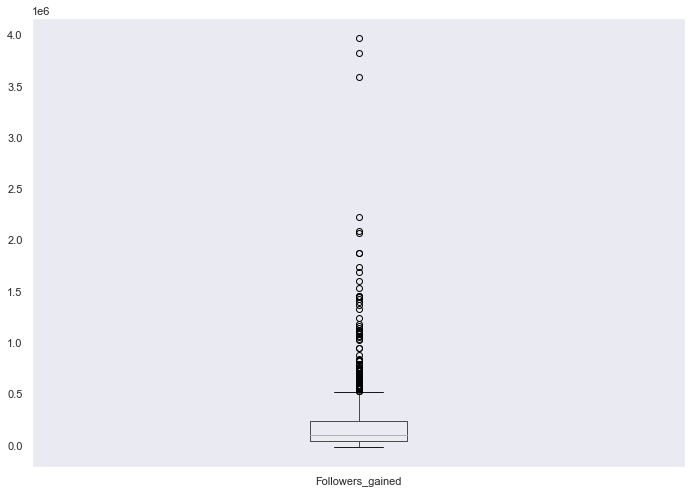

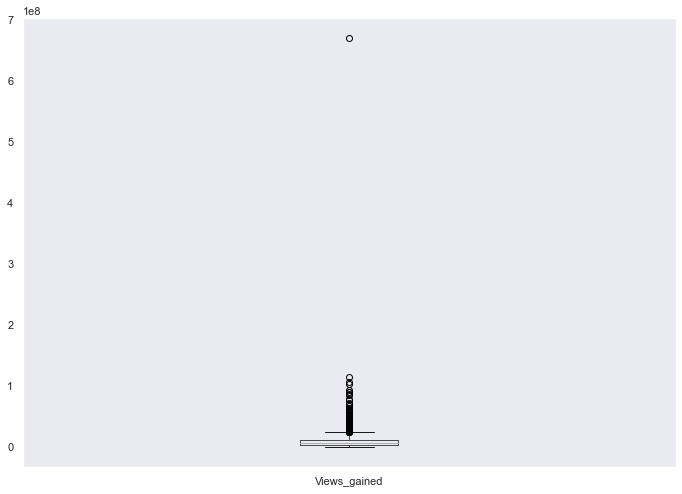

In [55]:
#ploting box plot of all the columns which might have outliers
column = 1
while column < 8:
    plot_boxplot(data,data.columns[column])
    column = column + 1

#### We can see in the above Box plots, that all the features have outliers 

#### Removing Outliers

In [17]:
#define a function called outliers which returns a list of index of outliers
# IQR = Q3 - Q1
# +/- 1.5 * IQR

def outliers(data, ft):
    Q1 = data[ft].quantile(0.25)
    Q3 = data[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = data.index[ (data[ft] < lower_bound) | (data[ft] > upper_bound) ]
    
    return ls

In [18]:
# creating an empty list to store the output indexes from multiple columns
index_list = []
for feature in data.loc[:,'Watch_time_minutes':'Views_gained']:
    index_list.extend(outliers(data,feature))

In [28]:
# checking length of the list
from operator import length_hint
print(length_hint(index_list))

638


In [29]:
# checking unique values in the list 
num_values = len(set(index_list))
print(num_values)

288


#### So, there are 288 rows with outliers in the data, we need to remove them

In [22]:
#defining a function called 'remove' which returns a cleaned dataframe without outliers
def remove(data, ls):
    ls = sorted(set(ls))
    data = data.drop(ls)
    return data

In [24]:
df_cleaned = remove(data, index_list)

In [32]:
# checking shape of new and clean dataframe
df_cleaned.shape

(712, 11)

#### we can see the shape of new Data Frame above, 
#### we have 712 rows left after removing 288 rows (with outliers)

#### Storing cleaned Dataframe into a csv file

In [35]:
df_cleaned.to_csv("twitchdata-update_cleaned.csv",index=False)

#### Loading the csv file (with clean data) into the new Dataframe

In [40]:
df_cleaned = pd.read_csv("twitchdata-update_cleaned.csv")

In [41]:
df_cleaned.head()

,Channel,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
0,uzra,812362125,208785,14181,3683,185506,29752,20715640,True,False,Chinese
1,Thijs,794621265,108720,24923,7180,755116,68557,15548337,True,False,English
2,TeePee,789698115,170010,78741,4410,520519,238257,17102146,True,True,English
3,Agraelus,779867430,169515,23555,4642,414951,132125,20334558,True,True,Czech
4,Elajjaz,726000045,145755,13080,4922,346566,37883,12800182,True,False,English


In [42]:
df_cleaned.tail()

,Channel,Watch_time_minutes,Stream_time_minutes,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
707,LAGTVMaximusBlack,123125340,161535,7138,725,256353,13251,2310313,True,True,English
708,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
709,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
710,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English
711,Remx,122192850,99180,13788,1205,178553,59432,2049420,True,False,French


In [63]:
df_cleaned.shape

(712, 11)

### 3) Relationship Analysis (to see the relationship between variables)

In [43]:
correlation = df_cleaned.corr()

#### Correlation Matrix

#### From the "Correlation Matrix" below, we can see that:
#### 1) Watch_time_minutes has a Strong Correlation with Views_gained
#### 2) Watch_time_minutes has a Strong Correlation with Average_viewers
#### 3) Peak_viewers has a Strong Correlation with Average_viewers
#### 4) Followers has a Strong Correlation with Followers_gained

<AxesSubplot:>

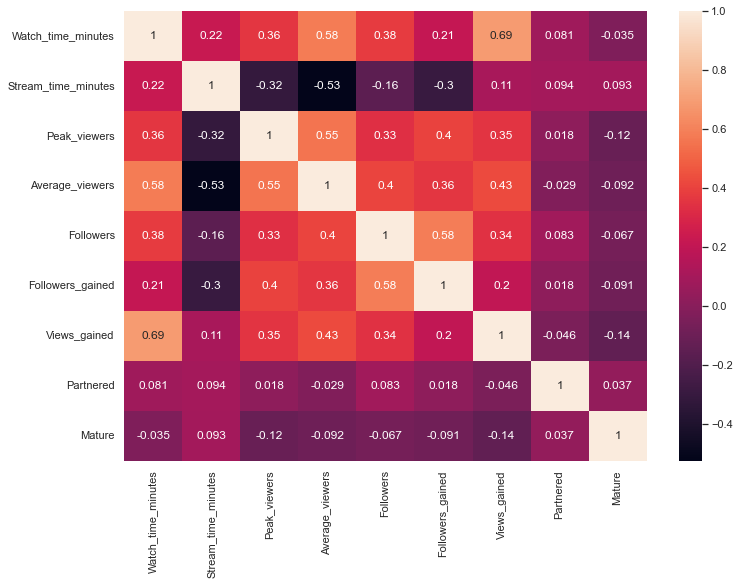

In [57]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns,
            annot=True)

#### Scatter plots

#### From the "Scatter Plot" below, we can see that:
#### 1) The streamers who had "Higher Watch time" (gained from the audience/viewers), 
#### have "Higher Number of Views gained" and vice versa.
#### 2) And most of the "Streamers (who gained views) are not Mature".

<AxesSubplot:xlabel='Watch_time_minutes', ylabel='Views_gained'>

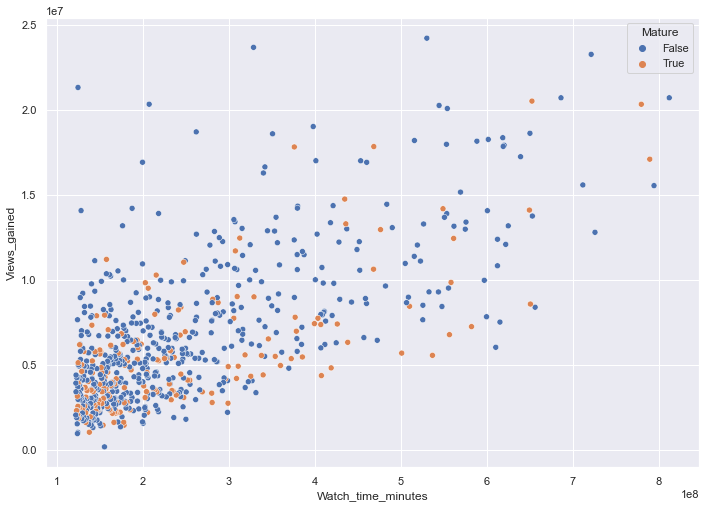

In [84]:
sns.scatterplot(x='Watch_time_minutes', y='Views_gained', hue='Mature', data=df_cleaned)

#### From the "Scatter Plot" below, we can see that:
#### 1) The streamers who had "Higher Watch time" (gained from the audience/viewers), 
#### gained "Higher Number of Average Viewers" and vice versa.
#### 2) And most of the "Streamers Partnered with Other Streamers".

<AxesSubplot:xlabel='Watch_time_minutes', ylabel='Average_viewers'>

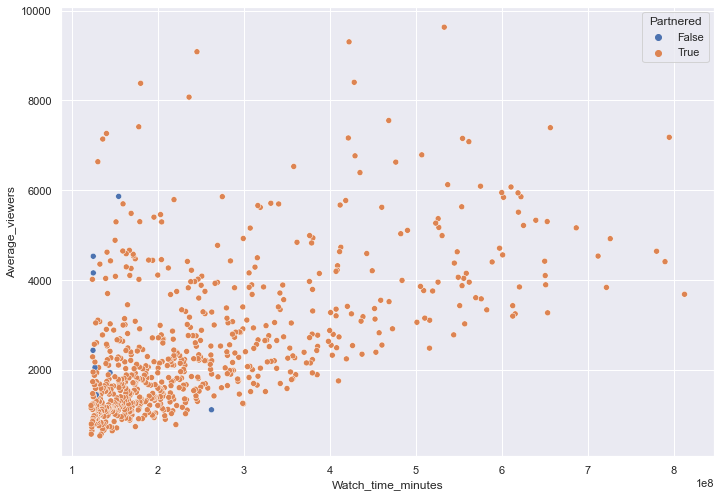

In [85]:
sns.scatterplot(x='Watch_time_minutes', y='Average_viewers', hue='Partnered', data=df_cleaned)

#### From the "Scatter Plot" below, we can see that:
#### 1) In most cases, the streamers who have "Higher number of Average Viewers" , 
#### have "Higher Number of Peak Viewers (maximum number of concurrent viewers during a live stream)" and vice versa.
#### 2) And most of the "Streamers (who have Peak Viewers) are not Mature".

<AxesSubplot:xlabel='Peak_viewers', ylabel='Average_viewers'>

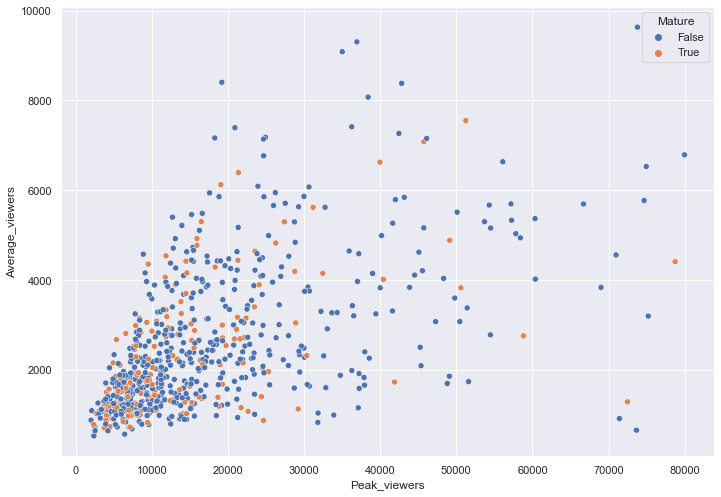

In [86]:
sns.scatterplot(x='Peak_viewers', y='Average_viewers', hue='Mature', data=df_cleaned)

#### From the "Scatter Plot" below, we can see that:
#### 1) In most cases, the streamers who had "Higher number of Followers" , 
#### "Gained More Followers" and vice versa.
#### 2) And most of the "Streamers (who gained Followers) are not Mature".

<AxesSubplot:xlabel='Followers', ylabel='Followers_gained'>

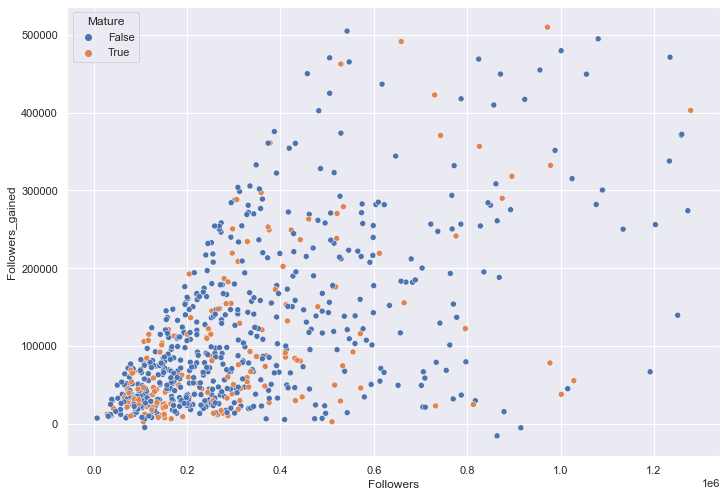

In [87]:
sns.scatterplot(x='Followers', y='Followers_gained', hue='Mature', data=df_cleaned)

#### Histograms (to see in which range most values are distributed)

<AxesSubplot:xlabel='Views_gained', ylabel='Count'>

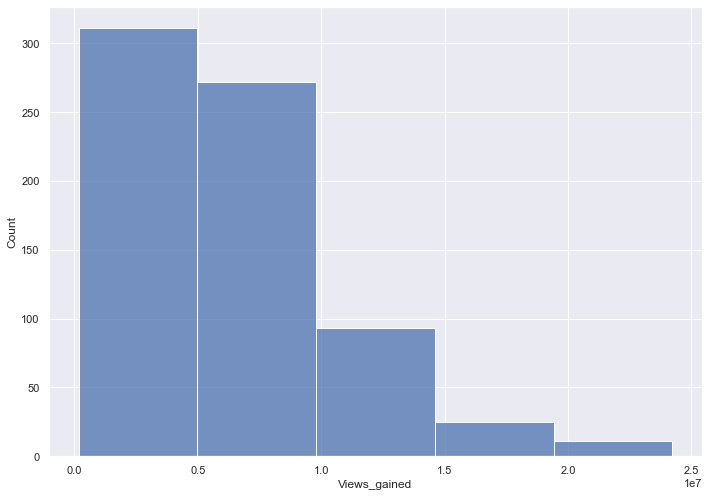

In [96]:
sns.histplot(df_cleaned['Views_gained'],bins=5)

<AxesSubplot:xlabel='Followers', ylabel='Count'>

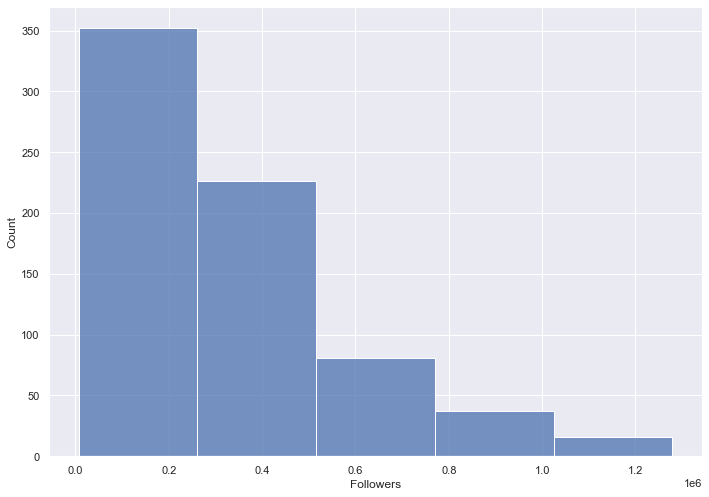

In [94]:
sns.histplot(df_cleaned['Followers'],bins=5)

<AxesSubplot:xlabel='Average_viewers', ylabel='Count'>

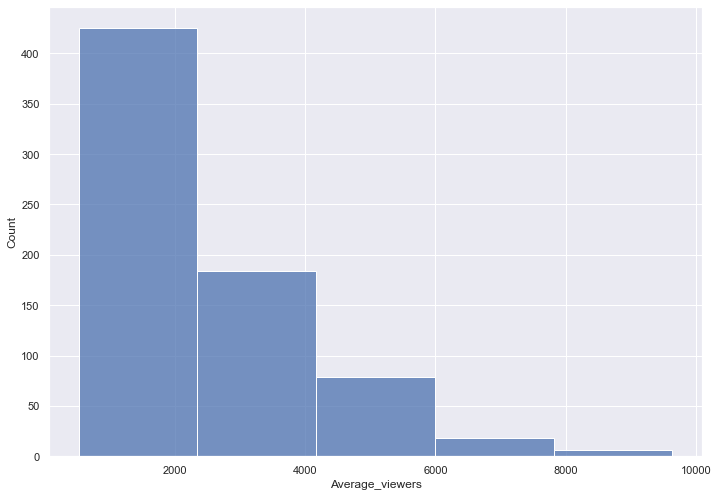

In [90]:
sns.histplot(df_cleaned['Average_viewers'],bins=5)

<AxesSubplot:xlabel='Peak_viewers', ylabel='Count'>

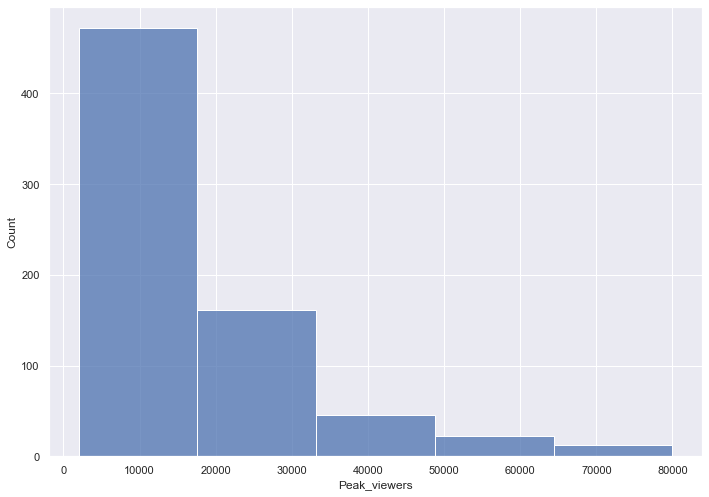

In [91]:
sns.histplot(df_cleaned['Peak_viewers'],bins=5)